<a href="https://colab.research.google.com/github/Mahdi-Saadati/Advanced-Machine-Learning-and-Deep-Neural-Networks/blob/main/7.b.%20Long%20Short%20Term%20Memory%20(LSTM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl" align="right">

شبکه عصبی حافظه طولانی کوتاه مدت (Long Short Term Memory - LSTM)

🧠 مشکل RNN ساده

در RNN گفتیم شبکه یه حافظه کوچیک داره.
اما مشکلش اینه که وقتی توالی خیلی طولانی میشه (مثلاً یک متن بلند یا سیگنال ECG چند دقیقه‌ای)،
شبکه کم‌کم چیزای قبلی رو فراموش می‌کنه.

✨ ورود LSTM

LSTM (Long Short-Term Memory) یک نوع خاص از RNN هست که برای همین مشکل ساخته شده.
اسمش یعنی: حافظه‌ی بلند و کوتاه‌مدت.

یعنی می‌تونه بعضی چیزها رو برای مدت کوتاه یادش بمونه (مثلاً یک کلمه یا ضربان اخیر).

بعضی چیزها رو هم برای مدت طولانی نگه داره (مثلاً موضوع کلی جمله یا ریتم کلی قلب).

🔑 ترفند LSTM

LSTM یه جور سیستم فیلتر هوشمند داره که تصمیم می‌گیره:

کدوم اطلاعات رو نگه داره،

کدوم اطلاعات رو فراموش کنه،

و چه چیزی رو به خروجی بده.

این فیلترها رو ما بهش می‌گیم گیت (Gate).

گیت فراموشی (Forget Gate) → چیزای بی‌اهمیت رو پاک کن.

گیت ورودی (Input Gate) → چیزای جدید مهم رو ذخیره کن.

گیت خروجی (Output Gate) → از بین چیزای ذخیره‌شده، اونایی که لازمه رو بیرون بده.

📦 تشبیه خیلی ساده

فرض کن یک نفر داره کتاب می‌خونه و یادداشت برمی‌داره:

چیزای مهم (مثل تاریخ‌های اصلی) رو توی دفترچه می‌نویسه.

چیزای بی‌اهمیت (مثل رنگ لباس شخصیت داستان) رو رد می‌کنه.

وقتی معلم ازش سوال می‌کنه، از دفترچه هم کمک می‌گیره.

این همون کاریه که LSTM می‌کنه.

📌 کاربردهای LSTM

پیش‌بینی قیمت سهام در طول زمان.

تحلیل ECG و EEG در پزشکی.

ترجمه و تولید متن.

تولید صدا یا موسیقی.

👉 خلاصه در یک جمله:
LSTM مثل یک RNN با حافظه‌ی هوشمنده، که می‌تونه یاد بگیره چه چیزهایی رو نگه داره و چه چیزهایی رو فراموش کنه.



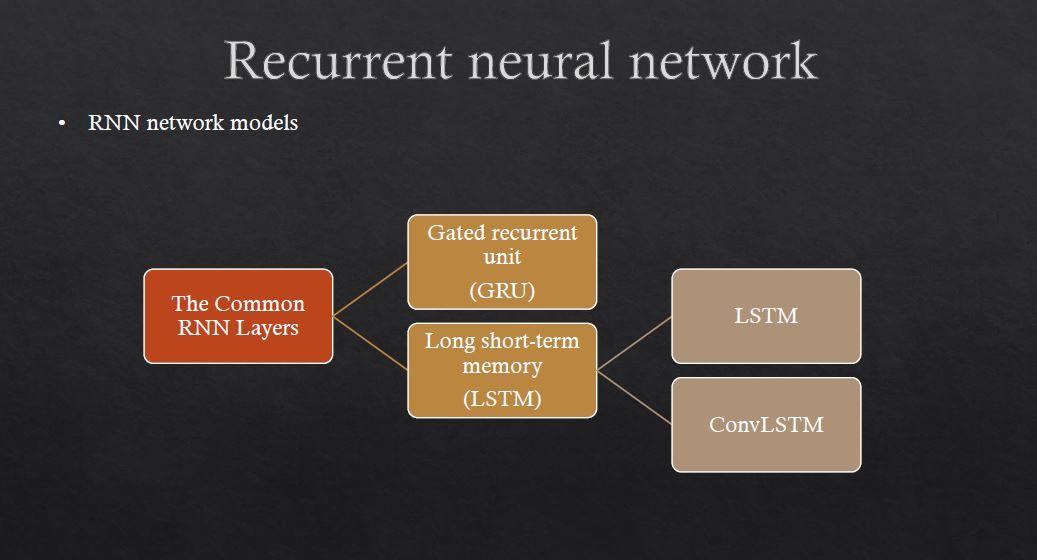

<div dir="rtl" align="right">

مثال  LSTM روی داده‌های ECG

برای شروع از دیتاست آماده‌ی ECG SciPy (همان سیگنال ۵ دقیقه‌ای) استفاده می‌کنیم و یک LSTM برای پیش‌بینی نمونه‌ی بعدی از سیگنال آموزش می‌دهیم.

Signal lenght: 300.0 second


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - loss: 0.1116 - val_loss: 0.0026
Epoch 2/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0033 - val_loss: 0.0024
Epoch 3/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0023 - val_loss: 0.0014
Epoch 4/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - loss: 0.0020 - val_loss: 0.0014
Epoch 5/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 17s 7ms/step - loss: 0.0020 - val_loss: 0.0013
Epoch 6/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 7/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - loss: 0.0018 - val_loss: 0.0013
Epoch 8/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0018 - val_loss: 0.0012
Epoch 9/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0017 - val_loss: 0.0012
Epoch 10/10
1349/1349 ━━━━━━━━━━━━━━━━━━━━ 9s 7ms/step - loss: 0.0018 - val_loss: 0.0010
675/675 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


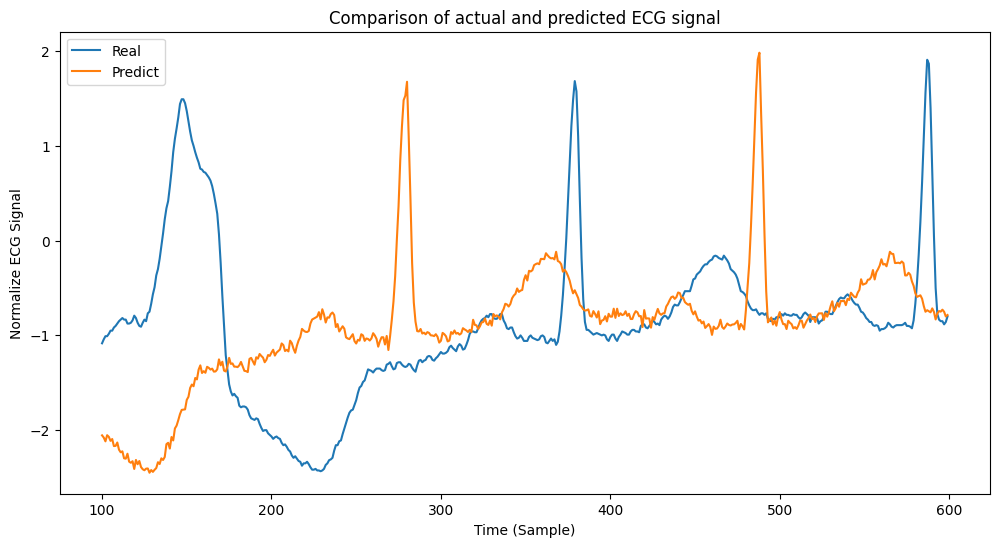

In [1]:
import numpy as np  # برای محاسبات عددی و آرایه‌ها
import matplotlib.pyplot as plt  # برای رسم نمودار
from scipy.datasets import electrocardiogram  # برای بارگذاری داده ECG آماده
from tensorflow.keras.models import Sequential  # مدل ترتیبی شبکه عصبی
from tensorflow.keras.layers import LSTM, Dense  # لایه LSTM و Dense (خروجی)
from tensorflow.keras.optimizers import Adam  # بهینه‌ساز آدم

# 1. بارگذاری داده ECG
signal = electrocardiogram()  # سیگنال ECG به صورت آرایه ۱ بعدی
fs = 360  # نرخ نمونه‌برداری (۳۶۰ نمونه در هر ثانیه)
print("Signal lenght:", signal.shape[0] / fs, "second")
# طول کل سیگنال را بر حسب ثانیه چاپ می‌کند

# 2. نرمال‌سازی (میانگین=0، واریانس=1)
signal = (signal - np.mean(signal)) / np.std(signal)
# سیگنال را طوری مقیاس می‌دهیم که مناسب یادگیری باشد

# 3. آماده‌سازی داده به صورت توالی
TIME_STEPS = 100  # ۱۰۰ نمونه قبلی برای پیش‌بینی نمونه بعدی
X, Y = [], []
for i in range(len(signal) - TIME_STEPS):
    X.append(signal[i:i+TIME_STEPS])  # یک پنجره‌ی ۱۰۰تایی
    Y.append(signal[i+TIME_STEPS])    # نمونه‌ی بعد از آن پنجره (هدف پیش‌بینی)
X = np.array(X)  # تبدیل به آرایه numpy
Y = np.array(Y)

# تغییر شکل برای LSTM → (نمونه‌ها، زمان، ویژگی‌ها)
X = X.reshape((X.shape[0], TIME_STEPS, 1))
# هر ورودی حالا سه‌بعدی است: (batch_size, 100 زمان، ۱ ویژگی)

# 4. تقسیم به آموزش و تست
split = int(0.8 * len(X))  # ۸۰ درصد آموزش و ۲۰ درصد تست
X_train, X_test = X[:split], X[split:]  # داده ورودی آموزش و تست
Y_train, Y_test = Y[:split], Y[split:]  # داده خروجی آموزش و تست

# 5. ساخت مدل LSTM
model = Sequential([
    LSTM(64, activation="tanh", input_shape=(TIME_STEPS, 1)),  # یک لایه LSTM با ۶۴ نرون
    Dense(1)  # خروجی یک عدد (سیگنال در نمونه بعدی)
])
model.compile(optimizer=Adam(learning_rate=0.001), loss="mse")
# استفاده از Adam برای بهینه‌سازی و MSE برای محاسبه خطا

# 6. آموزش
history = model.fit(X_train, Y_train, epochs=10, batch_size=64,
                    validation_data=(X_test, Y_test), verbose=1)
# مدل را ۱۰ دوره آموزش می‌دهد، دسته‌های ۶۴تایی، و روی داده تست هم ارزیابی می‌کند

# 7. پیش‌بینی
pred = model.predict(X_test)  # پیش‌بینی مقادیر تست

# 8. نمایش نتایج
plt.figure(figsize=(12,6))  # تنظیم اندازه نمودار
plt.plot(range(TIME_STEPS, TIME_STEPS+500), signal[split:split+500], label="Real")
# رسم ۵۰۰ نمونه واقعی از سیگنال
plt.plot(range(TIME_STEPS, TIME_STEPS+500), pred[:500].flatten(), label="Predict")
# رسم ۵۰۰ نمونه پیش‌بینی‌شده
plt.legend()  # نمایش راهنما
plt.xlabel('Time (Sample)')  # محور x: زمان بر اساس نمونه‌ها
plt.ylabel('Normalize ECG Signal')  # محور y: شدت سیگنال نرمال‌شده
plt.title('Comparison of actual and predicted ECG signal')  # عنوان نمودار
plt.show()  # نمایش نمودار

<div dir="rtl" align="right">

🔎 توضیح

دیتاست ECG SciPy یک سیگنال واقعی از دیتابیس MIT-BIH است.

هر بار ۱۰۰ نمونه قبلی را به مدل می‌دهیم تا نمونه‌ی بعدی را پیش‌بینی کند.

از LSTM استفاده کردیم چون بهتر از RNN ساده حافظه‌ی طولانی‌مدت را نگه می‌دارد.

نمودار نهایی مقایسه بین سیگنال واقعی و پیش‌بینی است.